# MODEL: 3 LE-NET

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import os
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings 
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()


In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(250,250,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(4, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 83, 83, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip='True')

In [12]:
training_set=train_datagen.flow_from_directory('data/train',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 3256 images belonging to 4 classes.


In [13]:
test_set = train_datagen.flow_from_directory('data/test',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 1052 images belonging to 4 classes.


In [14]:
from IPython.display import display

In [15]:
img_dims=150
epochs=40
batch_size=32

In [16]:
history =Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
101/101 [==============================] - 93s 919ms/step - loss: 1.1766 - accuracy: 0.4845 - val_loss: 0.7059 - val_accuracy: 0.7490
Epoch 2/40
101/101 [==============================] - 72s 715ms/step - loss: 0.7188 - accuracy: 0.7112 - val_loss: 1.0665 - val_accuracy: 0.5625
Epoch 3/40
101/101 [==============================] - 72s 716ms/step - loss: 0.5873 - accuracy: 0.7599 - val_loss: 0.3542 - val_accuracy: 0.8828
Epoch 4/40
101/101 [==============================] - 72s 712ms/step - loss: 0.5095 - accuracy: 0.8006 - val_loss: 0.2724 - val_accuracy: 0.9102
Epoch 5/40
101/101 [==============================] - 72s 716ms/step - loss: 0.4803 - accuracy: 0.8192 - val_loss: 0.2387 - val_accuracy: 0.9180
Epoch 6/40
101/101 [==============================] - 73s 719ms/step - loss: 0.4208 - accuracy: 0.8514 - val_loss: 0.2416 - val_accuracy: 0.9199
Epoch 7/40
101/101 [==============================] - 

In [17]:
import h5py

In [18]:
Classifier.save('blood.h5')

In [19]:
#tf.lite.TFLiteConverter.from_keras_model('object_')

In [20]:
from keras.models import load_model

In [21]:
model=load_model('blood.h5')

In [22]:
import numpy as np

In [84]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('b1.jpg',target_size=(250,250))

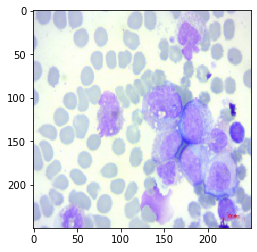

In [85]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [86]:
test_image=image.img_to_array(test_image)

In [87]:
test_image=np.expand_dims(test_image,axis=0)

In [88]:
result=model.predict(test_image)

In [89]:
prediction = result[0]

In [90]:
classes=training_set.class_indices

In [91]:
classes

{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}

In [92]:
prediction=list(prediction)

In [93]:
prediction

[1.0, 0.0, 0.0, 0.0]

In [94]:
classes=['Benign','Early','Pre','Pro']

In [95]:
output=zip(classes,prediction)

In [96]:
output=dict(output)

In [97]:
output

{'Benign': 1.0, 'Early': 0.0, 'Pre': 0.0, 'Pro': 0.0}

In [98]:
if output['Benign']==1.0 :
    print('Benign')
elif output['Early']==1.0:
    print('Early')
elif output['Pre']==1.0:
    print('Pre')
elif output['Pro']==1.0:
    print('Pro')


Benign


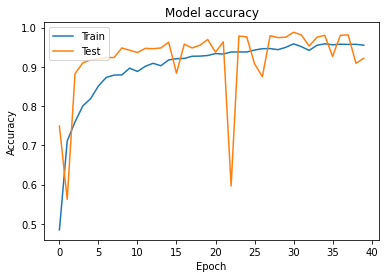

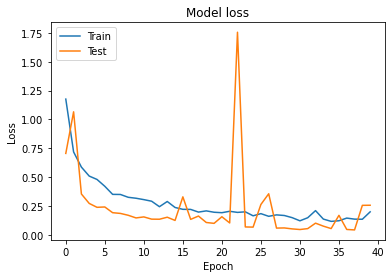

In [38]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()